<a href="https://colab.research.google.com/github/Anurag-sid/Stock-trend-prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [10]:
pip install yfinance

In [11]:
import yfinance as yf
start = '2010-01-01'
end = '2025-01-01'
df = yf.download('AAPL',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440330,6.455076,6.391278,6.422876,493729600
2010-01-05,6.451465,6.487878,6.417459,6.458085,601904800
2010-01-06,6.348847,6.477046,6.342226,6.451466,552160000
2010-01-07,6.337111,6.379844,6.291068,6.372321,477131200
2010-01-08,6.379241,6.379843,6.291368,6.328684,447610800


In [12]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.440330,6.455076,6.391278,6.422876,493729600
1,2010-01-05,6.451465,6.487878,6.417459,6.458085,601904800
2,2010-01-06,6.348847,6.477046,6.342226,6.451466,552160000
3,2010-01-07,6.337111,6.379844,6.291068,6.372321,477131200
4,2010-01-08,6.379241,6.379843,6.291368,6.328684,447610800


In [13]:
df = df.drop(['Date'],axis=1)
df.head()

<ipython-input-13-e8df29a4a784>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440330,6.455076,6.391278,6.422876,493729600
1,6.451465,6.487878,6.417459,6.458085,601904800
2,6.348847,6.477046,6.342226,6.451466,552160000
3,6.337111,6.379844,6.291068,6.372321,477131200
4,6.379241,6.379843,6.291368,6.328684,447610800


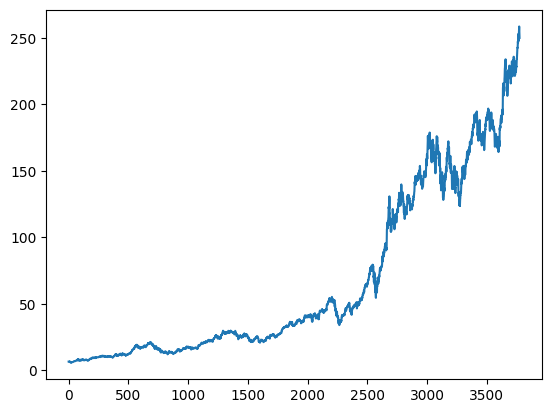

In [15]:
plt.plot(df.Close)

In [16]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440330,6.455076,6.391278,6.422876,493729600
1,6.451465,6.487878,6.417459,6.458085,601904800
2,6.348847,6.477046,6.342226,6.451466,552160000
3,6.337111,6.379844,6.291068,6.372321,477131200
4,6.379241,6.379843,6.291368,6.328684,447610800
...,...,...,...,...,...
3769,257.916443,257.926411,255.009620,255.209412,23234700
3770,258.735504,259.814335,257.347047,257.906429,27237100
3771,255.309296,258.415896,252.782075,257.546826,42355300


In [17]:
# Moving average(ma)
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3769,229.357535
3770,229.859200
3771,230.346935
3772,230.774993


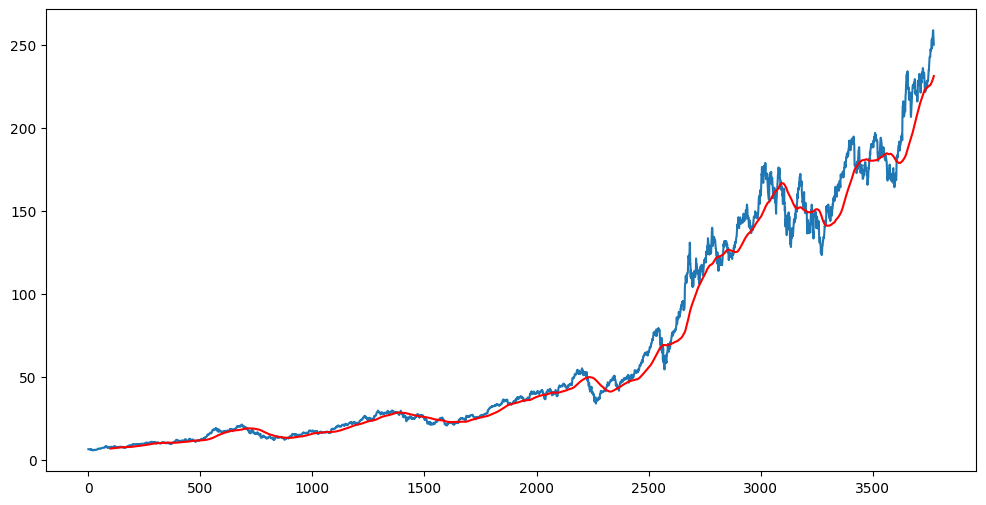

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [19]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3769,211.182570
3770,211.614168
3771,212.039086
3772,212.437766


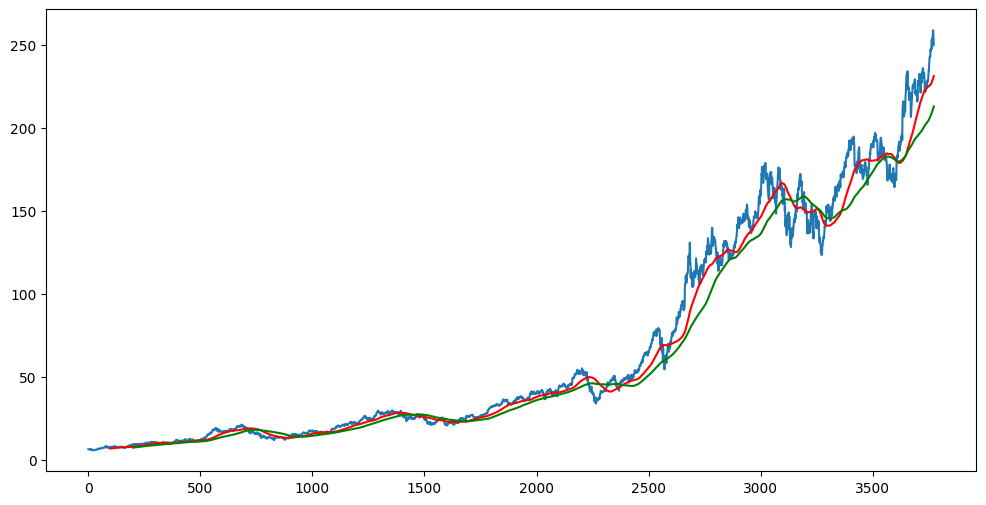

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [21]:
# Checking the number of Rows and columns.
df.shape

(3774, 5)

In [22]:
# Splitting the dataset into training and testing.
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2641, 1)
(1133, 1)


In [23]:
data_training.head()

Ticker,AAPL
0,6.440330
1,6.451465
2,6.348847
3,6.337111
4,6.379241


In [25]:
data_testing.head()

Ticker,AAPL
2641,88.601051
2642,88.601051
2643,90.971138
2644,90.688881
2645,92.801025


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00792291],
       [0.00805641],
       [0.00682613],
       ...,
       [0.96236619],
       [0.98614268],
       [0.99495297]])

In [28]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [30]:
x_train.shape

(2541, 100, 1)

In [29]:
#  Machine Learning Model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 274ms/step - loss: 0.0387
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 274ms/step - loss: 0.0049
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - loss: 0.0043
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 267ms/step - loss: 0.0036
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 41s 274ms/step - loss: 0.0032
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 44s 316ms/step - loss: 0.0034
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 37s 262ms/step - loss: 0.0032
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 280ms/step - loss: 0.0026
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 271ms/step - loss: 0.0030
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 290ms/step - loss: 0.0029
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 46s 348ms/step - loss: 0.0023
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 36s 293ms/step - loss: 0.0028
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 40s 276ms/step - loss: 0.0023
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 43s 306ms/step - loss: 0.0024
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 

In [34]:
model.save('stock_price_prediction_model.h5')

In [35]:
past_100_days = data_training.tail(100)

In [40]:
#final_df = past_100_days.append(data_testing,ignore_index=True)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [41]:
final_df.head()

Ticker,AAPL
0,77.664566
1,78.033440
2,77.562637
3,79.404564
4,78.839127


In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.11363835],
       [0.11544402],
       [0.11313939],
       ...,
       [0.98322834],
       [0.96665216],
       [0.95794843]])

In [43]:
input_data.shape

(1233, 1)

In [44]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [45]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1133, 100, 1)
(1133,)


In [46]:
# Making Prediction.
y_predicted = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step


In [47]:
y_predicted.shape

(1133, 1)

In [48]:
y_test

array([0.16717361, 0.16717361, 0.17877544, ..., 0.98322834, 0.96665216,
       0.95794843])

In [49]:
y_predicted

array([[0.19411418],
       [0.19575761],
       [0.19733629],
       ...,
       [0.8067796 ],
       [0.8085108 ],
       [0.8096111 ]], dtype=float32)

In [50]:
scaler.scale_

array([0.00489511])

In [51]:
scale_factor = 1/0.00489511
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

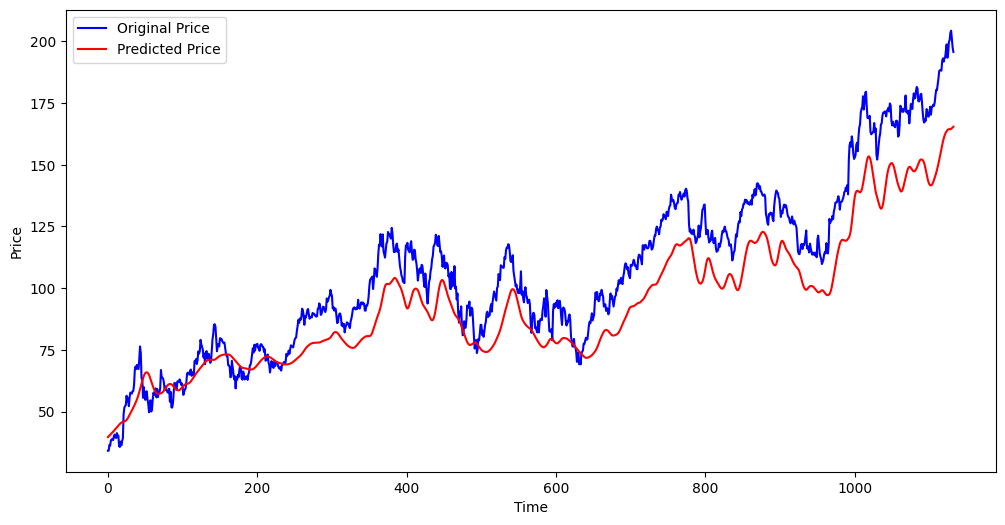

In [52]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()